old:Super weird, if we shift the action after we are certain the info from previous interval is not going to change, the results of the backtesting changes significantly for the worse. No idea why is that.

Notes: 
- actually for algoeur the model performed quite okey. Historical -24% and portfolio -6%
- actually for adaeur the model performed quite okey. Historical -22% and portfolio -7%
- actually for compeur the model performed quite okey. Historical -34% and portfolio -14%


In [127]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
pair_name = ""

In [195]:
runs_df = pd.read_csv("run_compeur_0.1.csv")
#runs_df = pd.read_csv("run_algoeur_20.0.csv")
#runs_df = pd.read_csv("run_adaeur_20.0.csv")
runs_df = runs_df.set_index(pd.to_datetime(runs_df.date))

In [196]:
runs_df["time"] = runs_df["date"].copy()

In [197]:
runs_df_first = runs_df.groupby("time").first().reset_index()
runs_df_first = runs_df_first.set_index(pd.to_datetime(runs_df_first.date))
runs_df_last = runs_df.groupby("time").last().reset_index()
runs_df_last = runs_df_last.set_index(pd.to_datetime(runs_df_last.date))

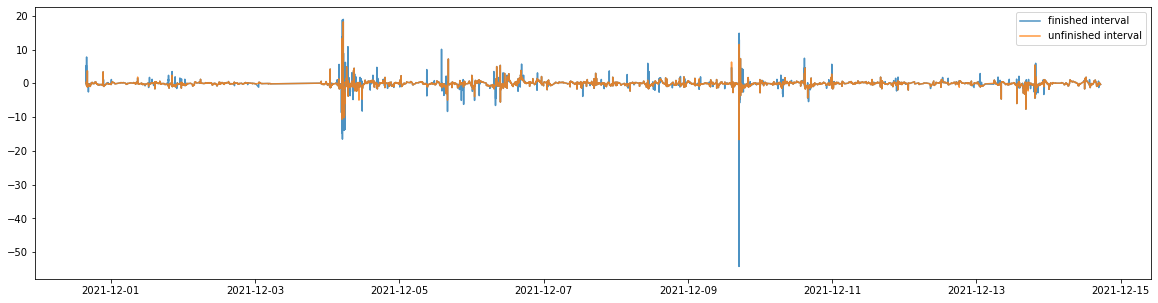

In [198]:
plt.figure(figsize=(20,5))
plt.plot(runs_df_last.preds, label="finished interval", alpha=0.8)
plt.plot(runs_df_first.preds, label="unfinished interval", alpha=0.8)

plt.legend()
plt.show()

In [184]:
# Saved
import pickle
import pandas as pd
from src.modules.paths import get_project_root
from src.core.features.utils import feature_pipeline, add_domain_features
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
with open("wow_20.pickle" ,'rb') as f:
    model = pickle.load(f)

In [199]:
df_test = pd.read_csv(get_project_root() / "data" / "historical" / "compeur.csv")

In [200]:
df_test_pro, _ = feature_pipeline(df_test, include_target=True, target_list=[20] )

In [201]:
columns_features = [col for col in df_test_pro.columns if col.startswith("feature")]

In [202]:
df_test_pro["preds"] = model.predict(df_test_pro[columns_features])

In [203]:
runs_df.date.min()

'2021-11-30 15:48:00'

In [204]:
runs_df

,date,open,close,low,high,vwap,volume,preds,time
date,,,,,,,,,
2021-11-30 15:48:00,2021-11-30 15:48:00,260.38,260.38,260.38,260.38,0.00,0.000,0.259001,2021-11-30 15:48:00
2021-11-30 15:49:00,2021-11-30 15:49:00,260.38,260.38,260.38,260.38,0.00,0.000,0.260946,2021-11-30 15:49:00
2021-11-30 15:48:00,2021-11-30 15:48:00,260.38,260.38,260.38,260.38,0.00,0.000,0.259001,2021-11-30 15:48:00
2021-11-30 15:49:00,2021-11-30 15:49:00,259.68,259.46,259.46,259.68,259.56,73.363,0.997150,2021-11-30 15:49:00
2021-11-30 15:49:00,2021-11-30 15:49:00,259.68,259.46,259.46,259.68,259.56,73.363,0.997153,2021-11-30 15:49:00
...,...,...,...,...,...,...,...,...,...
2021-12-14 17:15:00,2021-12-14 17:15:00,163.98,163.98,163.98,163.98,0.00,0.000,-0.347330,2021-12-14 17:15:00
2021-12-14 17:15:00,2021-12-14 17:15:00,163.98,163.98,163.98,163.98,0.00,0.000,-0.347334,2021-12-14 17:15:00
2021-12-14 17:16:00,2021-12-14 17:16:00,163.98,163.98,163.98,163.98,0.00,0.000,-0.332789,2021-12-14 17:16:00


In [205]:
df_test_pro.date.max()

'2021-12-14 15:45:00'

In [206]:
algo_df = df_test_pro[(df_test_pro.date>=runs_df.date.min()) & (df_test_pro.date<=runs_df.date.max()) ]
algo_df = algo_df.set_index(pd.to_datetime(algo_df.date))

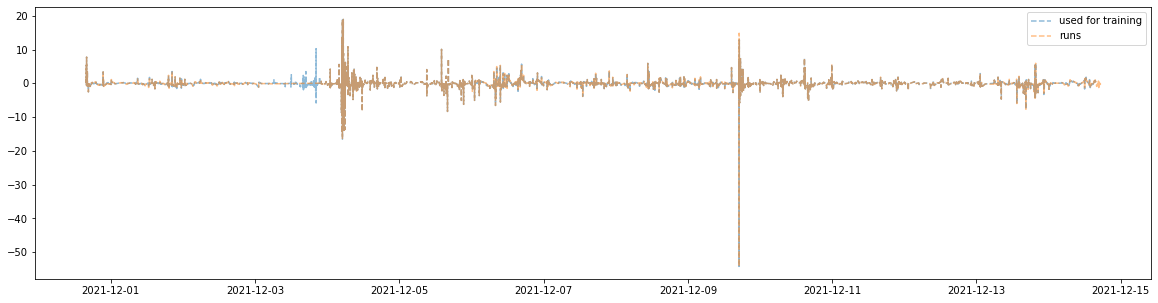

In [207]:
plt.figure(figsize=(20,5))
plt.plot(algo_df.preds,"--" , label="used for training", alpha=0.5)
plt.plot(runs_df_last.preds,  "--",label="runs",alpha=0.5)
plt.legend()
#plt.xlim(["2021-12-03", "2021-12-04"])
plt.show()

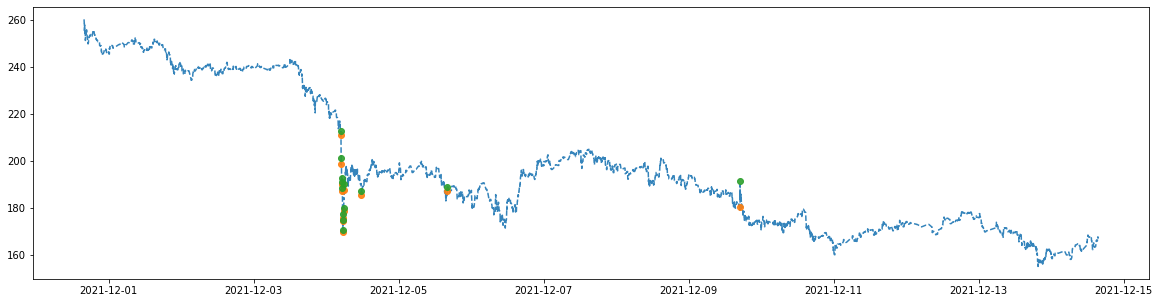

In [208]:
plt.figure(figsize=(20,5))

plt.plot(algo_df.open,  "--",label="runs",alpha=0.9)
plt.plot(algo_df[algo_df.preds<-8].open,  "o",label="runs",alpha=0.9)
plt.plot(algo_df[algo_df.preds<-8].close,  "o",label="runs",alpha=0.9)

In [209]:
# it worked as it should. Lets see the backtesting for that period

In [210]:

from src.core.backtest.backtesting import backtest_numba

In [211]:
df_backtest = df_test_pro[(df_test_pro.date>runs_df.date.min()) &(df_test_pro.date<runs_df.date.max()) ]

In [212]:
param={'take_profit_pct': 0.05876069829164293,
  'stop_loss_pct': 0.029986100049156885,
  'lim_pred_buy': -8.92214825484428
  }
list_metric = []
number_actions = []

#print(name)
actions = backtest_numba(
    indexes= df_backtest.time.values,
    open_values=df_backtest.open.values,
    preds_values=df_backtest.preds.values,
    **param
)
actions_df = pd.DataFrame(actions, columns=["index", "action", "cost", "comment"])
number_actions.append(actions_df.shape[0])
profit = actions_df["cost"].sum()/df_backtest["open"].mean()
hist_ratio = df_backtest.tail(1).open.values[0]/df_backtest.head(1).open.values[0]-1
list_metric.append(profit)#-hist_ratio)

In [213]:
print(profit)
print(hist_ratio)


-0.1485823408272137
-0.35709334565619233


In [214]:
actions_df["date"] = pd.to_datetime(actions_df['index'], unit='s')

In [215]:
actions_df

,index,action,cost,comment,date
0,1638593820,0,-201.35220,0,2021-12-04 04:57:00
1,1638594300,1,191.76984,2,2021-12-04 05:05:00
2,1638594540,0,-193.41056,0,2021-12-04 05:09:00
3,1638595320,1,176.91948,2,2021-12-04 05:22:00
4,1638595680,0,-170.09768,0,2021-12-04 05:28:00
5,1638596640,1,176.38164,1,2021-12-04 05:44:00
6,1638596760,0,-181.73404,0,2021-12-04 05:46:00
7,1638597600,1,188.84160,1,2021-12-04 06:00:00
8,1639069260,0,-190.60940,0,2021-12-09 17:01:00
9,1639074360,1,174.02112,2,2021-12-09 18:26:00


In [217]:
#Actual trades
from src.kraken.krakenclient import KrakenClient
api_public_key = open("../API_Public_Key").read().strip()
api_private_key = open("../API_Private_Key").read().strip()
kraken_client = KrakenClient(api_private_key=api_private_key, api_public_key=api_public_key)

In [218]:
#dict_closed = kraken_client.get_closed_order_from_start(start_id="OBZX5X-GNUDU-H6HZX3", end_id="OMONJM-2MP4E-2YSLRI")
dict_closed = kraken_client.get_closed_order()

In [219]:
trades_df = pd.DataFrame({k:v for k,v in dict_closed["result"]["closed"].items() if v["descr"]["pair"]=="COMPEUR"}).T

In [220]:
trades_df = trades_df.set_index(pd.to_datetime(trades_df["closetm"].astype(int), unit="s"))

In [221]:
trades_df["type"] = [d.get('type') for d in trades_df.descr]
trades_df["price"] = trades_df["price"].astype(float)

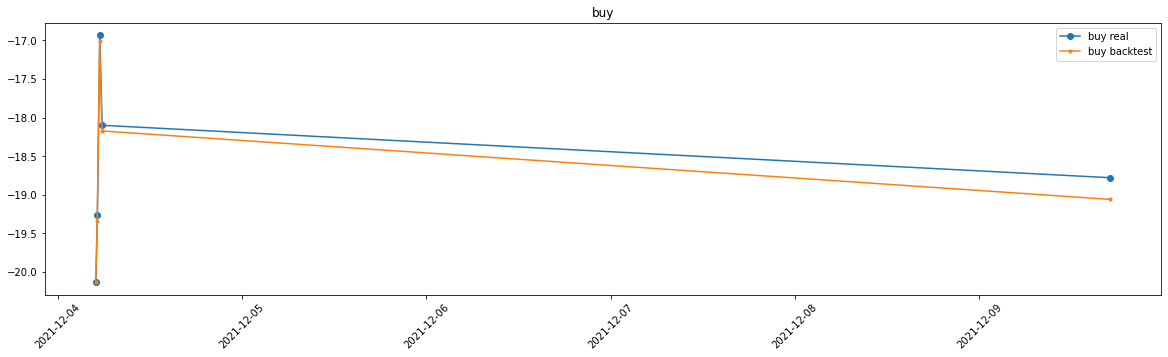

In [229]:
plt.figure(figsize=(20,5))
plt.plot(-trades_df[trades_df.type=="buy"].cost.astype(float), marker="o", label="buy real")
plt.plot(actions_df[actions_df.action==0].date,actions_df[actions_df.action==0].cost*0.1, marker=".", label="buy backtest")
plt.xticks(rotation=45)
plt.legend()
plt.title("buy")
plt.show()

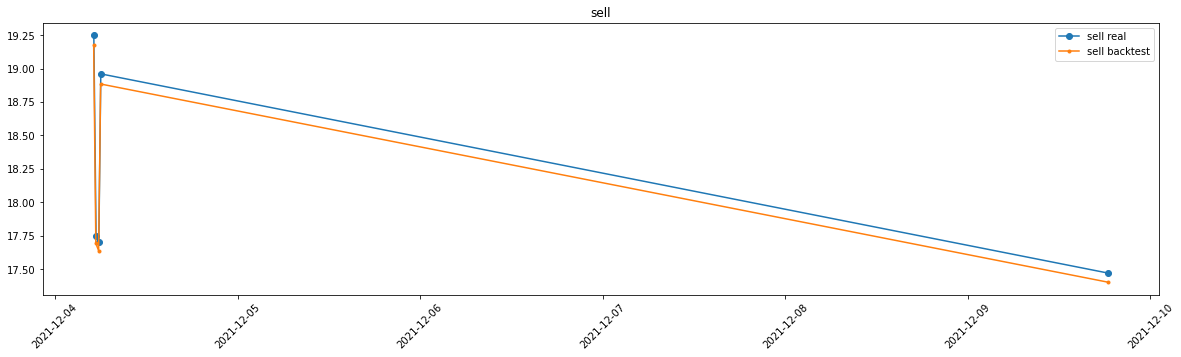

In [225]:
plt.figure(figsize=(20,5))
plt.plot(trades_df[trades_df.type=="sell"].cost.astype(float), marker="o", label="sell real")
plt.plot(actions_df[actions_df.action==1].date,actions_df[actions_df.action==1].cost*0.1, marker=".", label="sell backtest")
plt.xticks(rotation=45)
plt.legend()
plt.title("sell")
plt.show()


In [80]:
1.24190*20

24.838

In [226]:
trades_df["all_cost"]=None
trades_df.loc[trades_df.type=="buy", "all_cost"]= -trades_df[trades_df.type=="buy"].cost.astype(float)-trades_df[trades_df.type=="buy"].fee.astype(float)
trades_df.loc[trades_df.type=="sell", "all_cost"]= trades_df[trades_df.type=="sell"].cost.astype(float)-trades_df[trades_df.type=="sell"].fee.astype(float)

In [227]:
trades_df.type.value_counts()

buy     5
sell    5
Name: type, dtype: int64

In [228]:
(trades_df["all_cost"].sum())/abs(trades_df["all_cost"]).mean()

-0.1323784722222223

In [230]:
trades_df

,refid,userref,status,opentm,starttm,expiretm,descr,vol,vol_exec,cost,fee,price,stopprice,limitprice,misc,oflags,reason,closetm,type,all_cost
closetm,,,,,,,,,,,,,,,,,,,,
2021-12-09 18:27:35,None,0,closed,1.63907e+09,0,0,"{'pair': 'COMPEUR', 'type': 'sell', 'ordertype...",0.10000000,0.10000000,17.47,0.04,174.72,0.0000,0.0000,,fciq,None,1.63907e+09,sell,17.43
2021-12-09 17:02:41,None,0,closed,1.63907e+09,0,0,"{'pair': 'COMPEUR', 'type': 'buy', 'ordertype'...",0.10000000,0.10000000,18.78,0.04,187.87,0.0000,0.0000,,fciq,None,1.63907e+09,buy,-18.82
2021-12-04 06:01:09,None,0,closed,1.6386e+09,0,0,"{'pair': 'COMPEUR', 'type': 'sell', 'ordertype...",0.10000000,0.10000000,18.96,0.04,189.60,0.0000,0.0000,,fciq,None,1.6386e+09,sell,18.92
2021-12-04 05:47:45,None,0,closed,1.6386e+09,0,0,"{'pair': 'COMPEUR', 'type': 'buy', 'ordertype'...",0.10000000,0.10000000,18.10,0.04,181.01,0.0000,0.0000,,fciq,None,1.6386e+09,buy,-18.14
2021-12-04 05:45:37,None,0,closed,1.6386e+09,0,0,"{'pair': 'COMPEUR', 'type': 'sell', 'ordertype...",0.10000000,0.10000000,17.70,0.04,177.09,0.0000,0.0000,,fciq,None,1.6386e+09,sell,17.66
2021-12-04 05:29:07,None,0,closed,1.6386e+09,0,0,"{'pair': 'COMPEUR', 'type': 'buy', 'ordertype'...",0.10000000,0.10000000,16.93,0.04,169.38,0.0000,0.0000,,fciq,None,1.6386e+09,buy,-16.97
2021-12-04 05:23:54,None,0,closed,1.6386e+09,0,0,"{'pair': 'COMPEUR', 'type': 'sell', 'ordertype...",0.10000000,0.10000000,17.75,0.04,177.58,0.0000,0.0000,,fciq,None,1.6386e+09,sell,17.71
2021-12-04 05:10:28,None,0,closed,1.63859e+09,0,0,"{'pair': 'COMPEUR', 'type': 'buy', 'ordertype'...",0.10000000,0.10000000,19.26,0.03,192.64,0.0000,0.0000,,fciq,None,1.63859e+09,buy,-19.29
2021-12-04 05:06:07,None,0,closed,1.63859e+09,0,0,"{'pair': 'COMPEUR', 'type': 'sell', 'ordertype...",0.10000000,0.10000000,19.25,0.03,192.54,0.0000,0.0000,,fciq,None,1.63859e+09,sell,19.22
